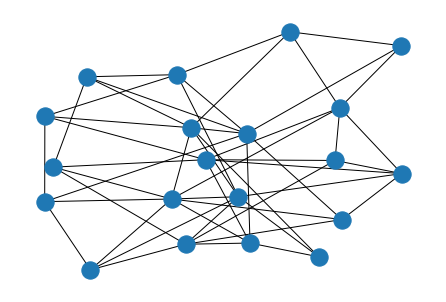

In [6]:
%matplotlib inline
from simulation import Simulation
import networkx as nx
G = nx.gnm_random_graph(20, 50)
nx.draw(G)


In [2]:
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'asleep'
    return state

In [3]:
initial_state(G)

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

In [4]:
import random
P_AWAKEN = 0.2
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'asleep':
            if random.random() < P_AWAKEN:
                next_state[node] = 'awake'
    return next_state

In [5]:
test_state = initial_state(G)
state_transition(G, test_state)

{4: 'awake', 7: 'awake', 9: 'awake', 13: 'awake', 16: 'awake', 18: 'awake'}

In [7]:
sim = Simulation(G, initial_state, state_transition, name='Simple Sim')

In [8]:
sim.state()

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

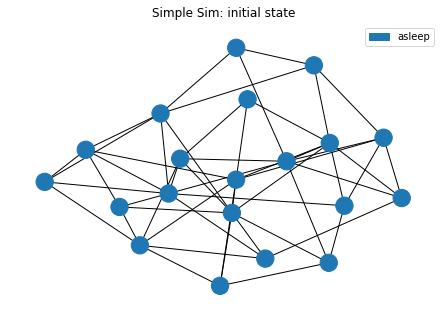

In [9]:
sim.draw()

In [10]:
sim.run()

In [11]:
sim.steps

1

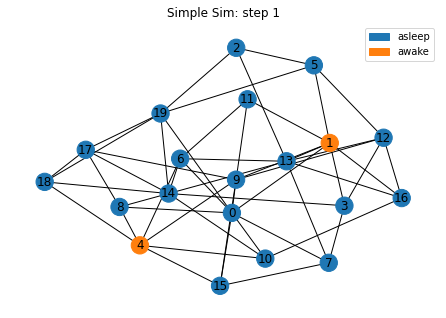

In [12]:
sim.draw(with_labels=True)

In [13]:
sim.state()

{0: 'asleep',
 1: 'awake',
 2: 'asleep',
 3: 'asleep',
 4: 'awake',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

In [14]:
sim.steps

1

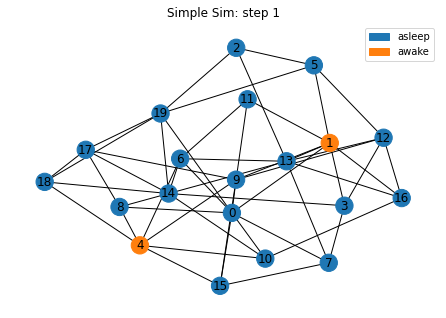

In [15]:
sim.draw(with_labels=True)

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

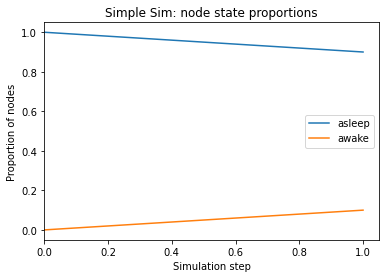

In [16]:
sim.plot()

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

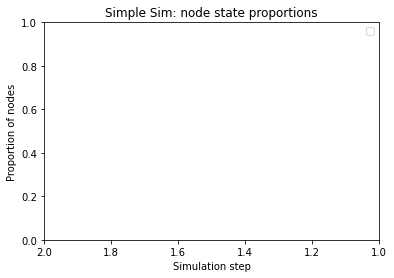

In [19]:
sim.plot(min_step=2, max_step=8)

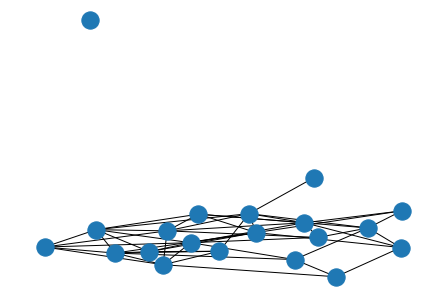

In [20]:
G = nx.gnm_random_graph(20, 50)
nx.draw(G)

In [21]:
import random
import string
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = random.choice('ABCD')
    return state

In [22]:
initial_state(G)

{0: 'D',
 1: 'D',
 2: 'C',
 3: 'A',
 4: 'C',
 5: 'A',
 6: 'B',
 7: 'C',
 8: 'C',
 9: 'B',
 10: 'B',
 11: 'C',
 12: 'B',
 13: 'A',
 14: 'B',
 15: 'A',
 16: 'B',
 17: 'A',
 18: 'D',
 19: 'B'}

In [23]:
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

In [24]:
test_state = initial_state(G)
state_transition(G, test_state)

{0: 'C',
 1: 'C',
 2: 'B',
 3: 'D',
 4: 'A',
 5: 'D',
 6: 'D',
 7: 'A',
 9: 'A',
 10: 'C',
 11: 'B',
 12: 'B',
 13: 'B',
 14: 'B',
 15: 'D',
 16: 'A',
 17: 'D',
 18: 'B',
 19: 'A'}

In [25]:
sim = Simulation(G, initial_state, state_transition, name='Voter Model')

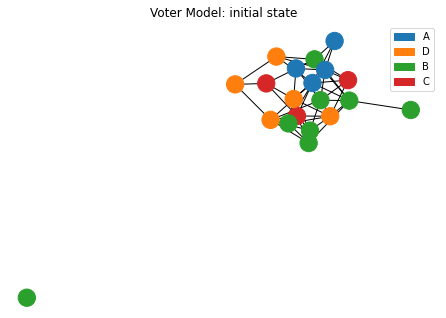

In [26]:
sim.draw()

In [27]:
sim.run(40)

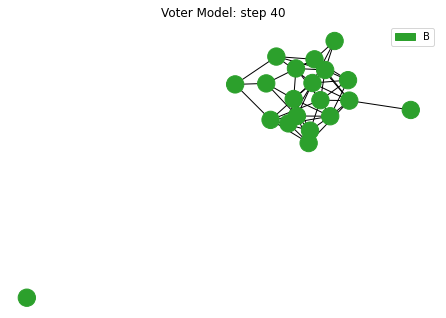

In [28]:
sim.draw()

<AxesSubplot:title={'center':'Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

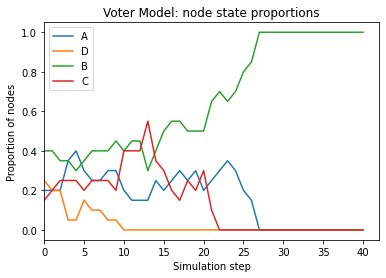

In [29]:
sim.plot()

In [30]:
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

In [31]:
def state_transition_async(G, current_state):
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state

In [32]:
def state_transition_async(G, current_state):
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state

<AxesSubplot:title={'center':'Async Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

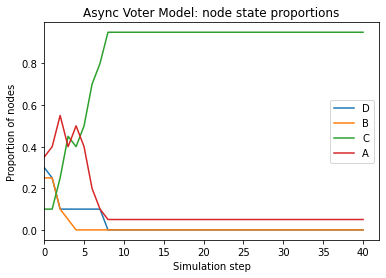

In [33]:
sim = Simulation(G, initial_state, state_transition_async, name='Async Voter Model')
sim.run(40)
sim.plot()

In [34]:
def stop_condition(G, current_state):
    unique_state_values = set(current_state.values())
    is_stopped = len(unique_state_values) <= 1
    return is_stopped

In [38]:
sim = Simulation(G, initial_state, state_transition, stop_condition, name='Voter model')
sim.run(6)

In [39]:
sim.steps

6

<AxesSubplot:title={'center':'Voter model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

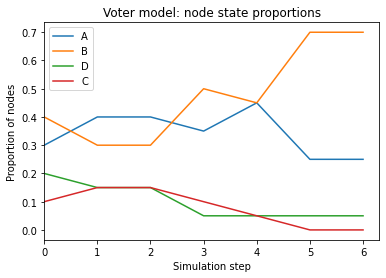

In [40]:
sim.plot()

In [41]:
def state_transition_async_rewiring(G, current_state):
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
            neighbor = random.choice(list(G.neighbors(node)))
            if current_state[node] != current_state[neighbor]:
                G.remove_edge(node, neighbor)        
    return current_state

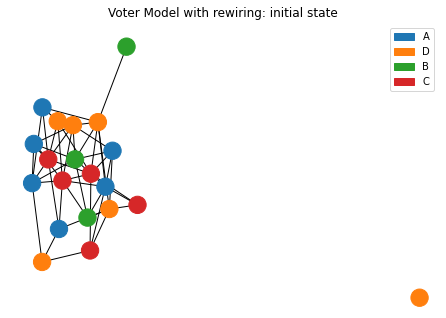

In [42]:
sim = Simulation(G, initial_state, state_transition_async_rewiring, stop_condition,name='Voter Model with rewiring')
sim.draw()

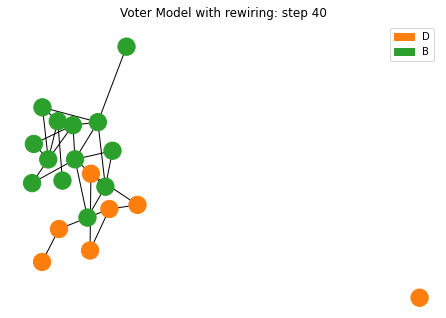

In [43]:
sim.run(40)
sim.draw()

<AxesSubplot:title={'center':'Voter Model with rewiring: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

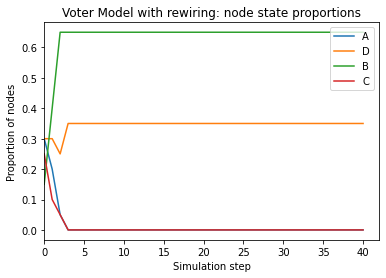

In [44]:
sim.plot()

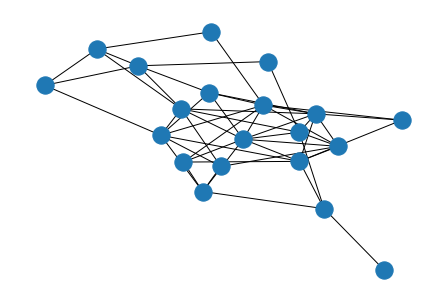

In [45]:
G = nx.gnm_random_graph(20, 50)
nx.draw(G)

In [46]:
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S'  
    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'
    return state

In [47]:
initial_state(G)

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'I',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S'}

In [49]:
MU = 0.1
BETA = 0.1
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'I':
            if random.random() < MU:
                next_state[node] = 'S'
        else: 
            for neighbor in G.neighbors(node):
                if current_state[neighbor] == 'I':
                    if random.random() < BETA:
                        next_state[node] = 'I'
    return next_state

In [50]:
test_state = initial_state(G)
state_transition(G, test_state)

{}

In [51]:
sim = Simulation(G, initial_state, state_transition, name='SIS model')

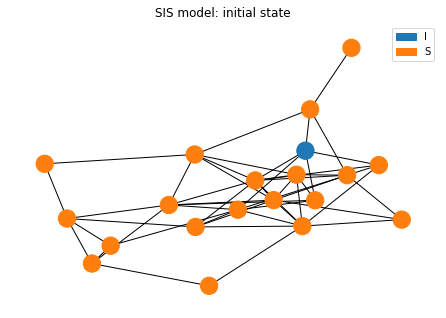

In [52]:
sim.draw()

In [53]:
sim.run(25)

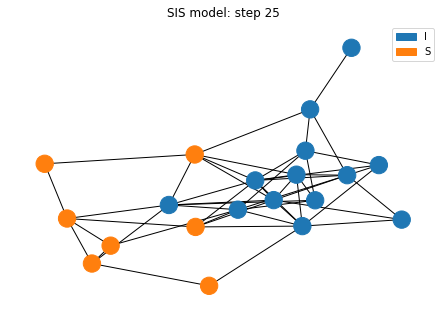

In [54]:
sim.draw()

<AxesSubplot:title={'center':'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

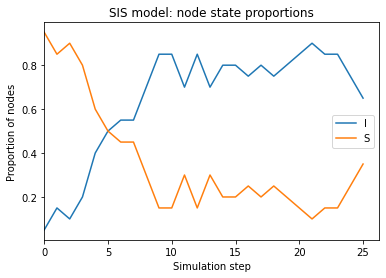

In [55]:
sim.plot()